### Question 1

In [2]:
import pandas as pd
import numpy as np
import os

print(os.getcwd())
print(os.listdir())

cir_20_df = pd.read_csv("cir_20.csv", low_memory=False)
cir_19_df = pd.read_csv("cir_19.csv", low_memory=False)


def dimension(*workf):
    for file in workf:
        print(f"File dimensions: {file.shape}")
        print(f"column names: {file.columns}\n")


dimension(cir_19_df, cir_20_df)


## default option of duplicate is to only remove duplicate lines where all entries are the same, add subset="INCIDENT_NUMBER" to use only key column
## when concatenate, need to reset the index with ignore_index=True, else loc and iloc will not work properly
## the code here is just creating a blank data frame and concatenate the file as you loop through them
def joincir(*dfs):
    joincir_dupe = pd.DataFrame()
    i = 0
    for df in dfs:
        i += 1
        joincir_dupe = pd.concat([joincir_dupe, df], ignore_index=True)
    joincir_df = joincir_dupe.drop_duplicates()
    print(f"{i} data frames has been joined with no duplicates, "
          f"new data frame's dimension: {joincir_df.shape}\n")
    print(joincir_df, "\n")
    return joincir_df

cir_19_20 = joincir(cir_19_df, cir_20_df)


## not using numpy
## this also creates a drop list with the indices for the lines dropped and remove the duplicates
# def drop_nazero(df, *columns):
#     print("Dropping values with 0 or null:")
#     drop_list = []
#     for column in columns:
#         drop_list_temp = df.index[(df[column] == 0) | (df[column].isna())]
#         drop_list.extend(item for item in drop_list_temp if item not in drop_list)
#         print(f"{len(drop_list_temp)} lines with null or 0 for column {column}")
#     lines_dropped = len(drop_list)
#     clean_df = df.drop(drop_list)
#     clean_df = clean_df.reset_index(drop=True)
#     print(f"\n{lines_dropped} lines have been dropped from the file"
#           f" for 0 or null values in columns {list(columns)}")
#     print(f"new file dimension: {clean_df.shape}\n")
#     return clean_df


## using numpy
## this is faster but I still prefer having a list of index of things dropped
## code change all value 0 to null and drop them where appropriate (0 not a valid value)
def drop_nazero(df, *columns):
    print("Changing 'O' to 'null' and drop all null:")
    for column in columns:
        df.loc[df[column] == 0, column] = np.nan
        print(f"null count for {column} is: {df[column].isna().sum()}")
    clean_df = df.dropna(subset=list(columns))
    clean_df = clean_df.reset_index(drop=True)
    lines_dropped = len(df) - len(clean_df)
    print(f"\n{lines_dropped} lines have been dropped from the file"
           f" for 0 or null values in columns {list(columns)}")
    print(f"new file dimension: {clean_df.shape}\n")
    return clean_df


## columns that has 0 as null
column_crit_nazero = ["INCIDENT_NUMBER",
                      "OFFENSE_CODE",
                      "DISTRICT",
                      "OCCURRED_ON_DATE",
                      "Long",
                      "Lat"]
## columns that has 0 as value; here SHOOTING takes Bool (1 or 0)
column_crit_na = ["SHOOTING"]

cir_19_20_temp = drop_nazero(cir_19_20, *column_crit_nazero)
cir_19_20_clean = cir_19_20_temp.dropna(subset=column_crit_na)

print(cir_19_20_clean, "\n")
# cir_19_20_clean.to_csv("cir_19_20_clean.csv", index=False)
# print(os.listdir())

C:\Users\User\OneDrive\School\2022\compSoc\Assignments\Assignment_6
['.ipynb_checkpoints', 'cir_19.csv', 'cir_19_20_clean.csv', 'cir_20.csv', 'cir_21.csv', 'drafts.py', 'draft_basic.py', 'offensecodes.xlsx', 'test1.py', 'test2.py', 'test3.py', 'test_file.xlsx', 'viet_assignment_6.ipynb']
File dimensions: (87184, 17)
column names: Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

File dimensions: (70894, 17)
column names: Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

2 data frames has been joined with no duplicates, new data 

### Question 2

C:\Users\User\OneDrive\School\2022\compSoc\Assignments\Assignment_6
['.ipynb_checkpoints', 'cir_19.csv', 'cir_19_20_clean.csv', 'cir_20.csv', 'cir_21.csv', 'drafts.py', 'draft_basic.py', 'offensecodes.xlsx', 'test1.py', 'test2.py', 'test3.py', 'test_file.xlsx', 'viet_assignment_6.ipynb'] 

       INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0            102091671        2647.0                 NaN   
1            102095489        3115.0                 NaN   
2            102096818        2905.0                 NaN   
3            129099936        1106.0                 NaN   
4            129100024        3201.0                 NaN   
...                ...           ...                 ...   
151890       020063425        3114.0                 NaN   
151891       020062356        1107.0                 NaN   
151892       020046400        1501.0                 NaN   
151893       020038446        1501.0                 NaN   
151894       020030892         540.0             

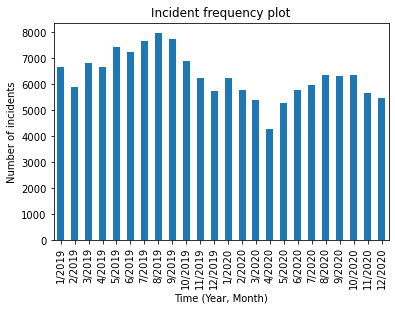

In [3]:
import pandas as pd
import os

print(os.getcwd())
print(os.listdir(), "\n")

cir_c = pd.read_csv("cir_19_20_clean.csv", low_memory=False)
print(cir_c, "\n")

freq_table = cir_c.groupby(['YEAR', 'MONTH']).agg({"INCIDENT_NUMBER": "count"}).reset_index()

## code is adding a column to the table so labeling the x-axis is easier
freq_table["time label"] = freq_table["MONTH"].astype(str) + "/" + freq_table["YEAR"].astype(str)
freq_plot = freq_table.plot(kind="bar",
                            legend=False,
                            x="time label",
                            y="INCIDENT_NUMBER",
                            title="Incident frequency plot",
                            xlabel="Time (Year, Month)",
                            ylabel="Number of incidents")

print(freq_table, "\n")
print(freq_plot, "\n")

### Question 3 and 4
- Total number of property crimes decreased from 2019 to 2020, percentage wise this type of crime makes of for a larger proportion of total incidents
- Number of property crimes mirrors the trend of total incident, peaking in the months of Aug and Sept for both years
- Both number and the proportion of violent crimes decreased significantly from 2019 to 2020; number of violent crimes swell over summer of 2019 - this is going in the opposite direction for 2020
- There are some spatial overlaps between where violent crimes and property crimes happened, particularly in districts A1, C11, B2, and D4. There are some locations where property crimes are prevalent despite lower numbers, such as in A15


In [2]:
import pandas as pd
import numpy as np
import os

print(os.getcwd())
print(os.listdir(), "\n")

## I realized that the code book "code" is not unique
## merging as normal leads to a lot of new entries because it is a many to many match
## code below to clean code book first before merging
code_book = pd.read_excel("offensecodes.xlsx")
code_book = code_book.drop_duplicates(subset="CODE")
code_book = code_book.rename(columns={"CODE": "OFFENSE_CODE", "NAME": "OFFENSE_NAME"})
print(code_book)

cir_joined = pd.read_csv("cir_19_20_clean.csv", low_memory=False)
cir_joined["OFFENSE_CODE"] = cir_joined["OFFENSE_CODE"].astype(int)
cir_joined.loc[cir_joined["DISTRICT"] == "External", ["DISTRICT"]] = np.nan
print(cir_joined)

cir_joined_code = cir_joined.merge(code_book, how="left", on="OFFENSE_CODE", validate="m:1")
print(cir_joined_code, "\n")

## I'm assuming murder is its own category, so is breaking and entering...
## Making this into a dictionary for convenience for the first method I'm using
crime_types = {"property_crime": ["burglar", "larceny", "auto theft", "arson"]
               , "violent_crime": ["robbery", "assault", "rape", "a&b"]}
               # , "death_crime": ["murder", "manslaughter"]}


## this is a function that takes: the crime dictionary, data frame, a column for string checking, the df unique key (column names), and group (a list of column names) as input return tally tables by group for each crime type and total incidents of subtypes
## due to instances of different key words being used in the same offense name (e.g. "larceny theft"), we need to take care not to double count
## for each crime type:
## the code goes through each list of keywork, and make a new column taking bool value (True if key word detected, False if not or if cell is null) and report number of cases
## a "count" column is created for each crime type, summing across the key word column for each row. This will be > 1 if there are double counting
## change all values that are not 0 to 1
## create a frequency table for each crime type by chosen period and the final few columns to prove the work
def crime_tally(c_types, df, colchk, ukey, grp):
    for t in list(c_types.keys()):
        for i, phrase in enumerate(c_types[t]):
            df[c_types[t][i]] = df[colchk].str.contains(phrase, na=False, case=False, regex=True)
            print(f"Number of '{c_types[t][i]}': {df[c_types[t][i]].sum()}")
        df[t] = df[c_types[t]].sum(axis=1)
        df.loc[df[t] != 0, t] = 1
        tally = df.groupby(grp, dropna=True).agg({t: "sum", ukey: "count"}).reset_index()
        tally["perc"] = tally[t] / tally[ukey]
        print(f"\nTally for {t} crimes:\n {tally}\n")
    print(f"Last few columns:\n {df.iloc[:, -13:]}")


crime_tally(crime_types, cir_joined_code, "OFFENSE_NAME", "INCIDENT_NUMBER", ["YEAR", "MONTH"])
crime_tally(crime_types, cir_joined_code, "OFFENSE_NAME", "INCIDENT_NUMBER", ["DISTRICT"])


## below is the simplier version of this code for one type of crime
# def violent_tally(df):
#     for i, phrase in enumerate(crime_types["violent_crime"]):
#         df[crime_types["violent_crime"][i]] = df["OFFENSE_NAME"].str.contains(phrase, case=False, na=False)
#         print("Number of ", crime_types["violent_crime"][i], ": ", df[crime_types["violent_crime"][i]].sum())
#     df["count"] = df[crime_types["violent_crime"]].sum(axis=1)
#     df.loc[df["count"] != 0, "count"] = 1
#     tally = df.groupby(["YEAR"], dropna=True).agg({"count": "sum", "INCIDENT_NUMBER": "count"}).reset_index()
#     tally["perc"] = tally["count"] / tally["INCIDENT_NUMBER"]
#     print(f"\n{tally}\n")
#
#
# violent_tally(cir_joined_code)


## below is the apply method
## this is more lines of code, but much easier to understand
## we also don't need to worry about multiple key words since code checks cell for any match with list
## probably this code can be more efficient, e.g. def crime_check(type, cell): to combine the first two function
# def is_property(cell):
#     for phrase in crime_types["property_crime"]:
#         if phrase.upper() in str(cell):
#             return True
#     else:
#         return False
#
#
# def is_violent(cell):
#     for phrase in crime_types["violent_crime"]:
#         if phrase.upper() in str(cell):
#             return True
#     else:
#         return False
#
#
# def violent_tally(df):
#     df["is_violent"] = df["OFFENSE_NAME"].apply(is_violent)
#     violent_tally = df.groupby(["YEAR"], dropna=True).agg({"is_violent": "sum", "INCIDENT_NUMBER": "count"}).reset_index()
#     violent_tally["PERC"] = violent_tally["is_violent"] / violent_tally["INCIDENT_NUMBER"]
#     print(violent_tally)
#
#
# def property_tally(df):
#     df["is_property"] = df["OFFENSE_NAME"].apply(is_property)
#     property_tally = df.groupby(["YEAR"], dropna=True).agg({"is_property": "sum", "INCIDENT_NUMBER": "count"}).reset_index()
#     property_tally["PERC"] = property_tally["is_property"] / property_tally["INCIDENT_NUMBER"]
#     print(property_tally)
#
#
# violent_tally(cir_joined_code)
# property_tally(cir_joined_code)

C:\Users\User\OneDrive\School\2022\compSoc\Assignments\Assignment_6
['.ipynb_checkpoints', 'cir_19.csv', 'cir_19_20_clean.csv', 'cir_20.csv', 'cir_21.csv', 'drafts.py', 'draft_basic.py', 'offensecodes.xlsx', 'test1.py', 'test2.py', 'test3.py', 'test_file.xlsx', 'viet_assignment_6.ipynb'] 

     OFFENSE_CODE                               OFFENSE_NAME
0             612           LARCENY PURSE SNATCH - NO FORCE 
1             613                        LARCENY SHOPLIFTING
2             615    LARCENY THEFT OF MV PARTS & ACCESSORIES
3            1731                                     INCEST
4            3111                  LICENSE PREMISE VIOLATION
..            ...                                        ...
571          1806  DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572          1807  DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573          1610    HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574          2010                              HOME INVASION
575          1620  HUMAN TRAFFICKING -